In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
cv.__version__

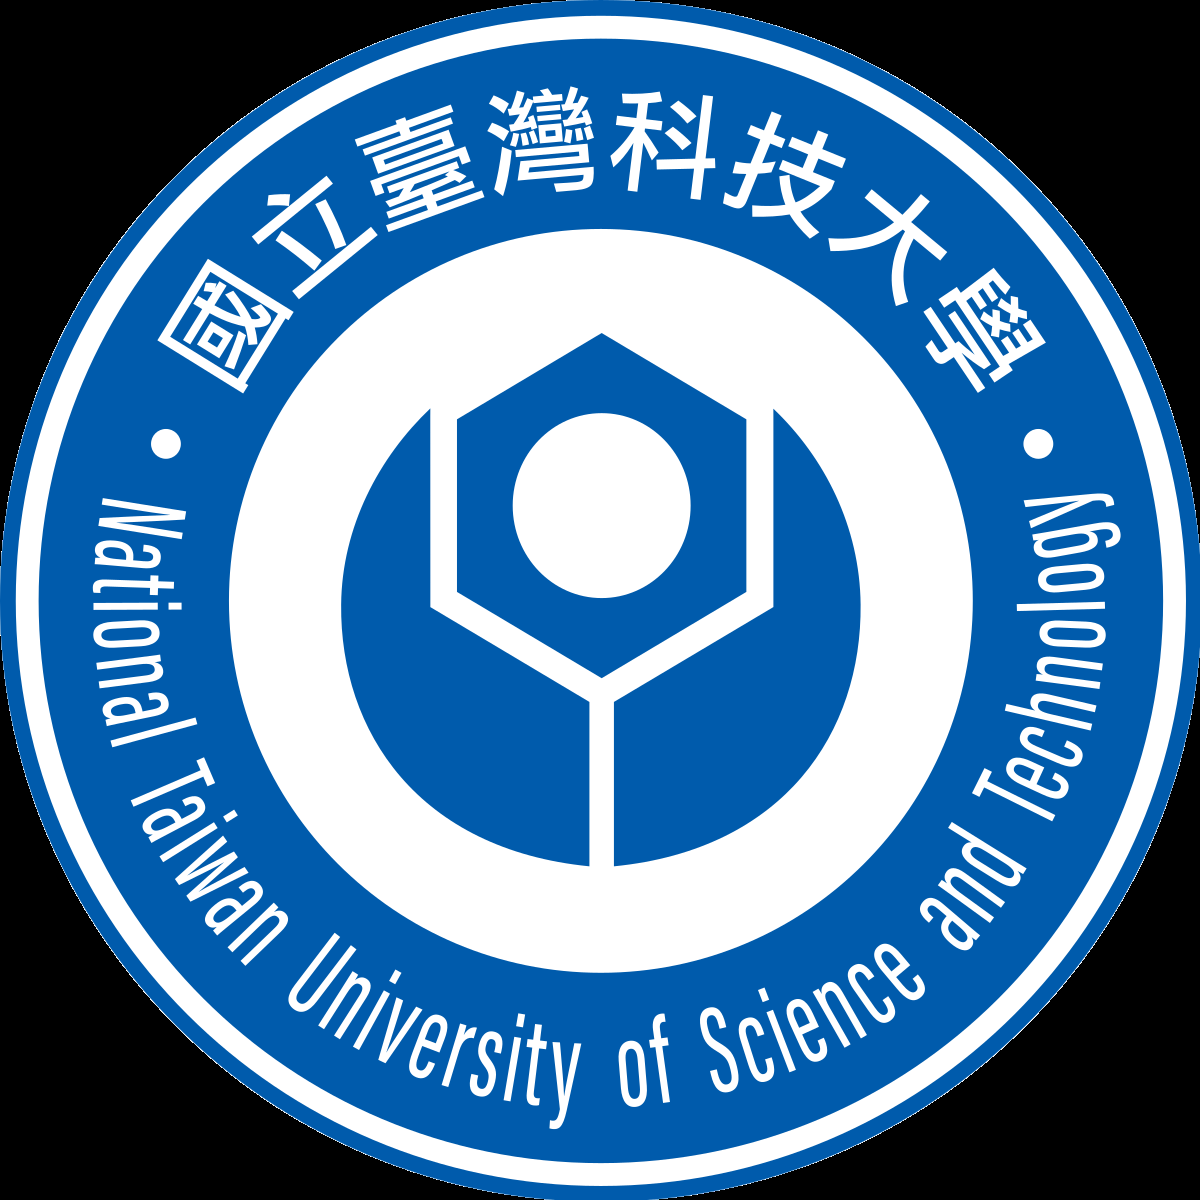

In [2]:
from google.colab.patches import cv_imshow
import cv2 as cv
import sys
import os
import numpy as np
fr = r'/content/drive/MyDrive/images'
path_img = os.path.join(fr,'ntust.png')
img = cv.imread(path_img)

if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)

In [4]:
print(img.shape)

(1200, 1200, 3)


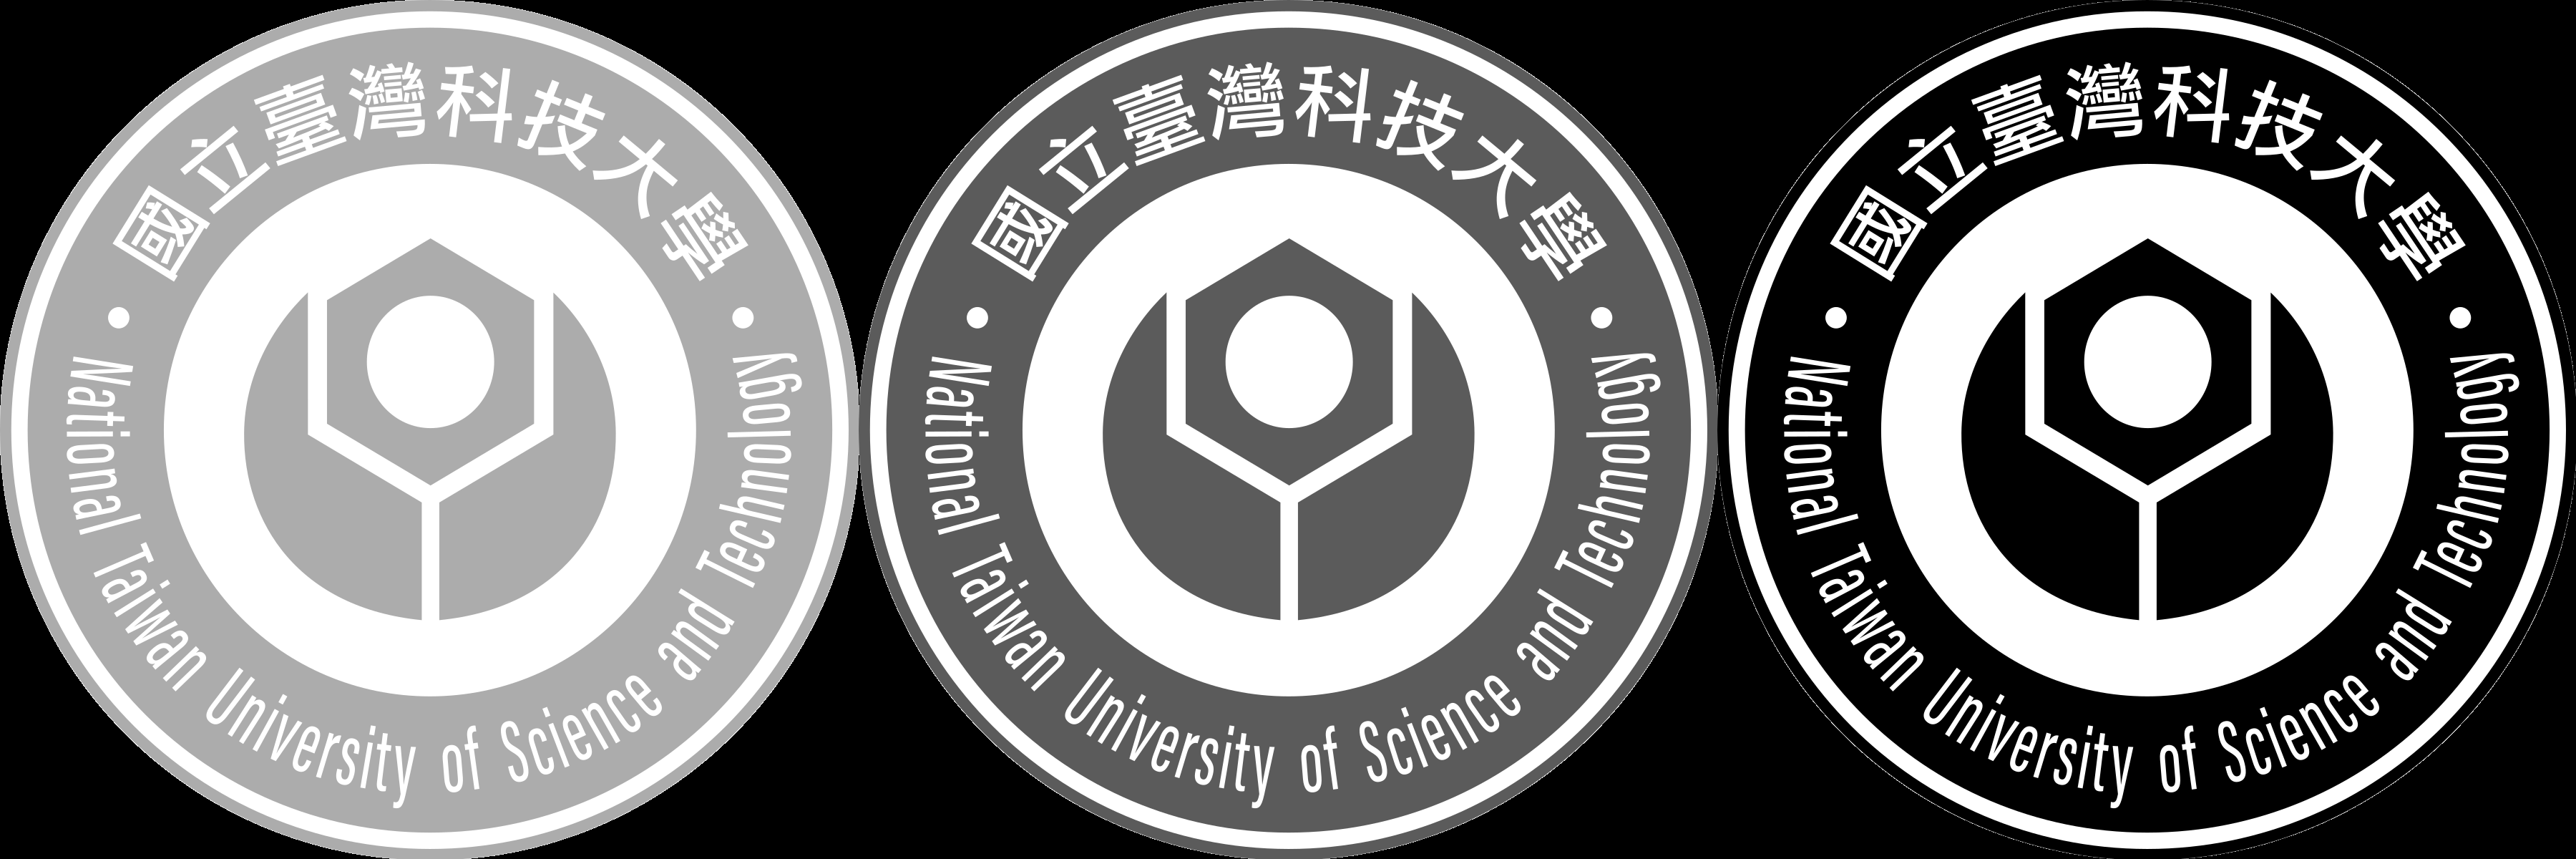

In [5]:
b,g,r = cv.split(img)
res = np.hstack([b,g,r])
cv_imshow(res)

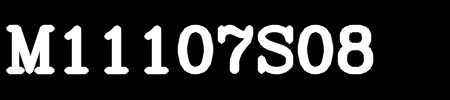

In [6]:
def create_img(shape,text):
  img = np.zeros(shape,dtype='uint8')
  font = cv.FONT_HERSHEY_COMPLEX
  img_out = cv.putText(img,text,(5,70),font,2,(255),5,cv.LINE_AA)
  cv_imshow(img_out)
create_img((100,450),'M11107S08')

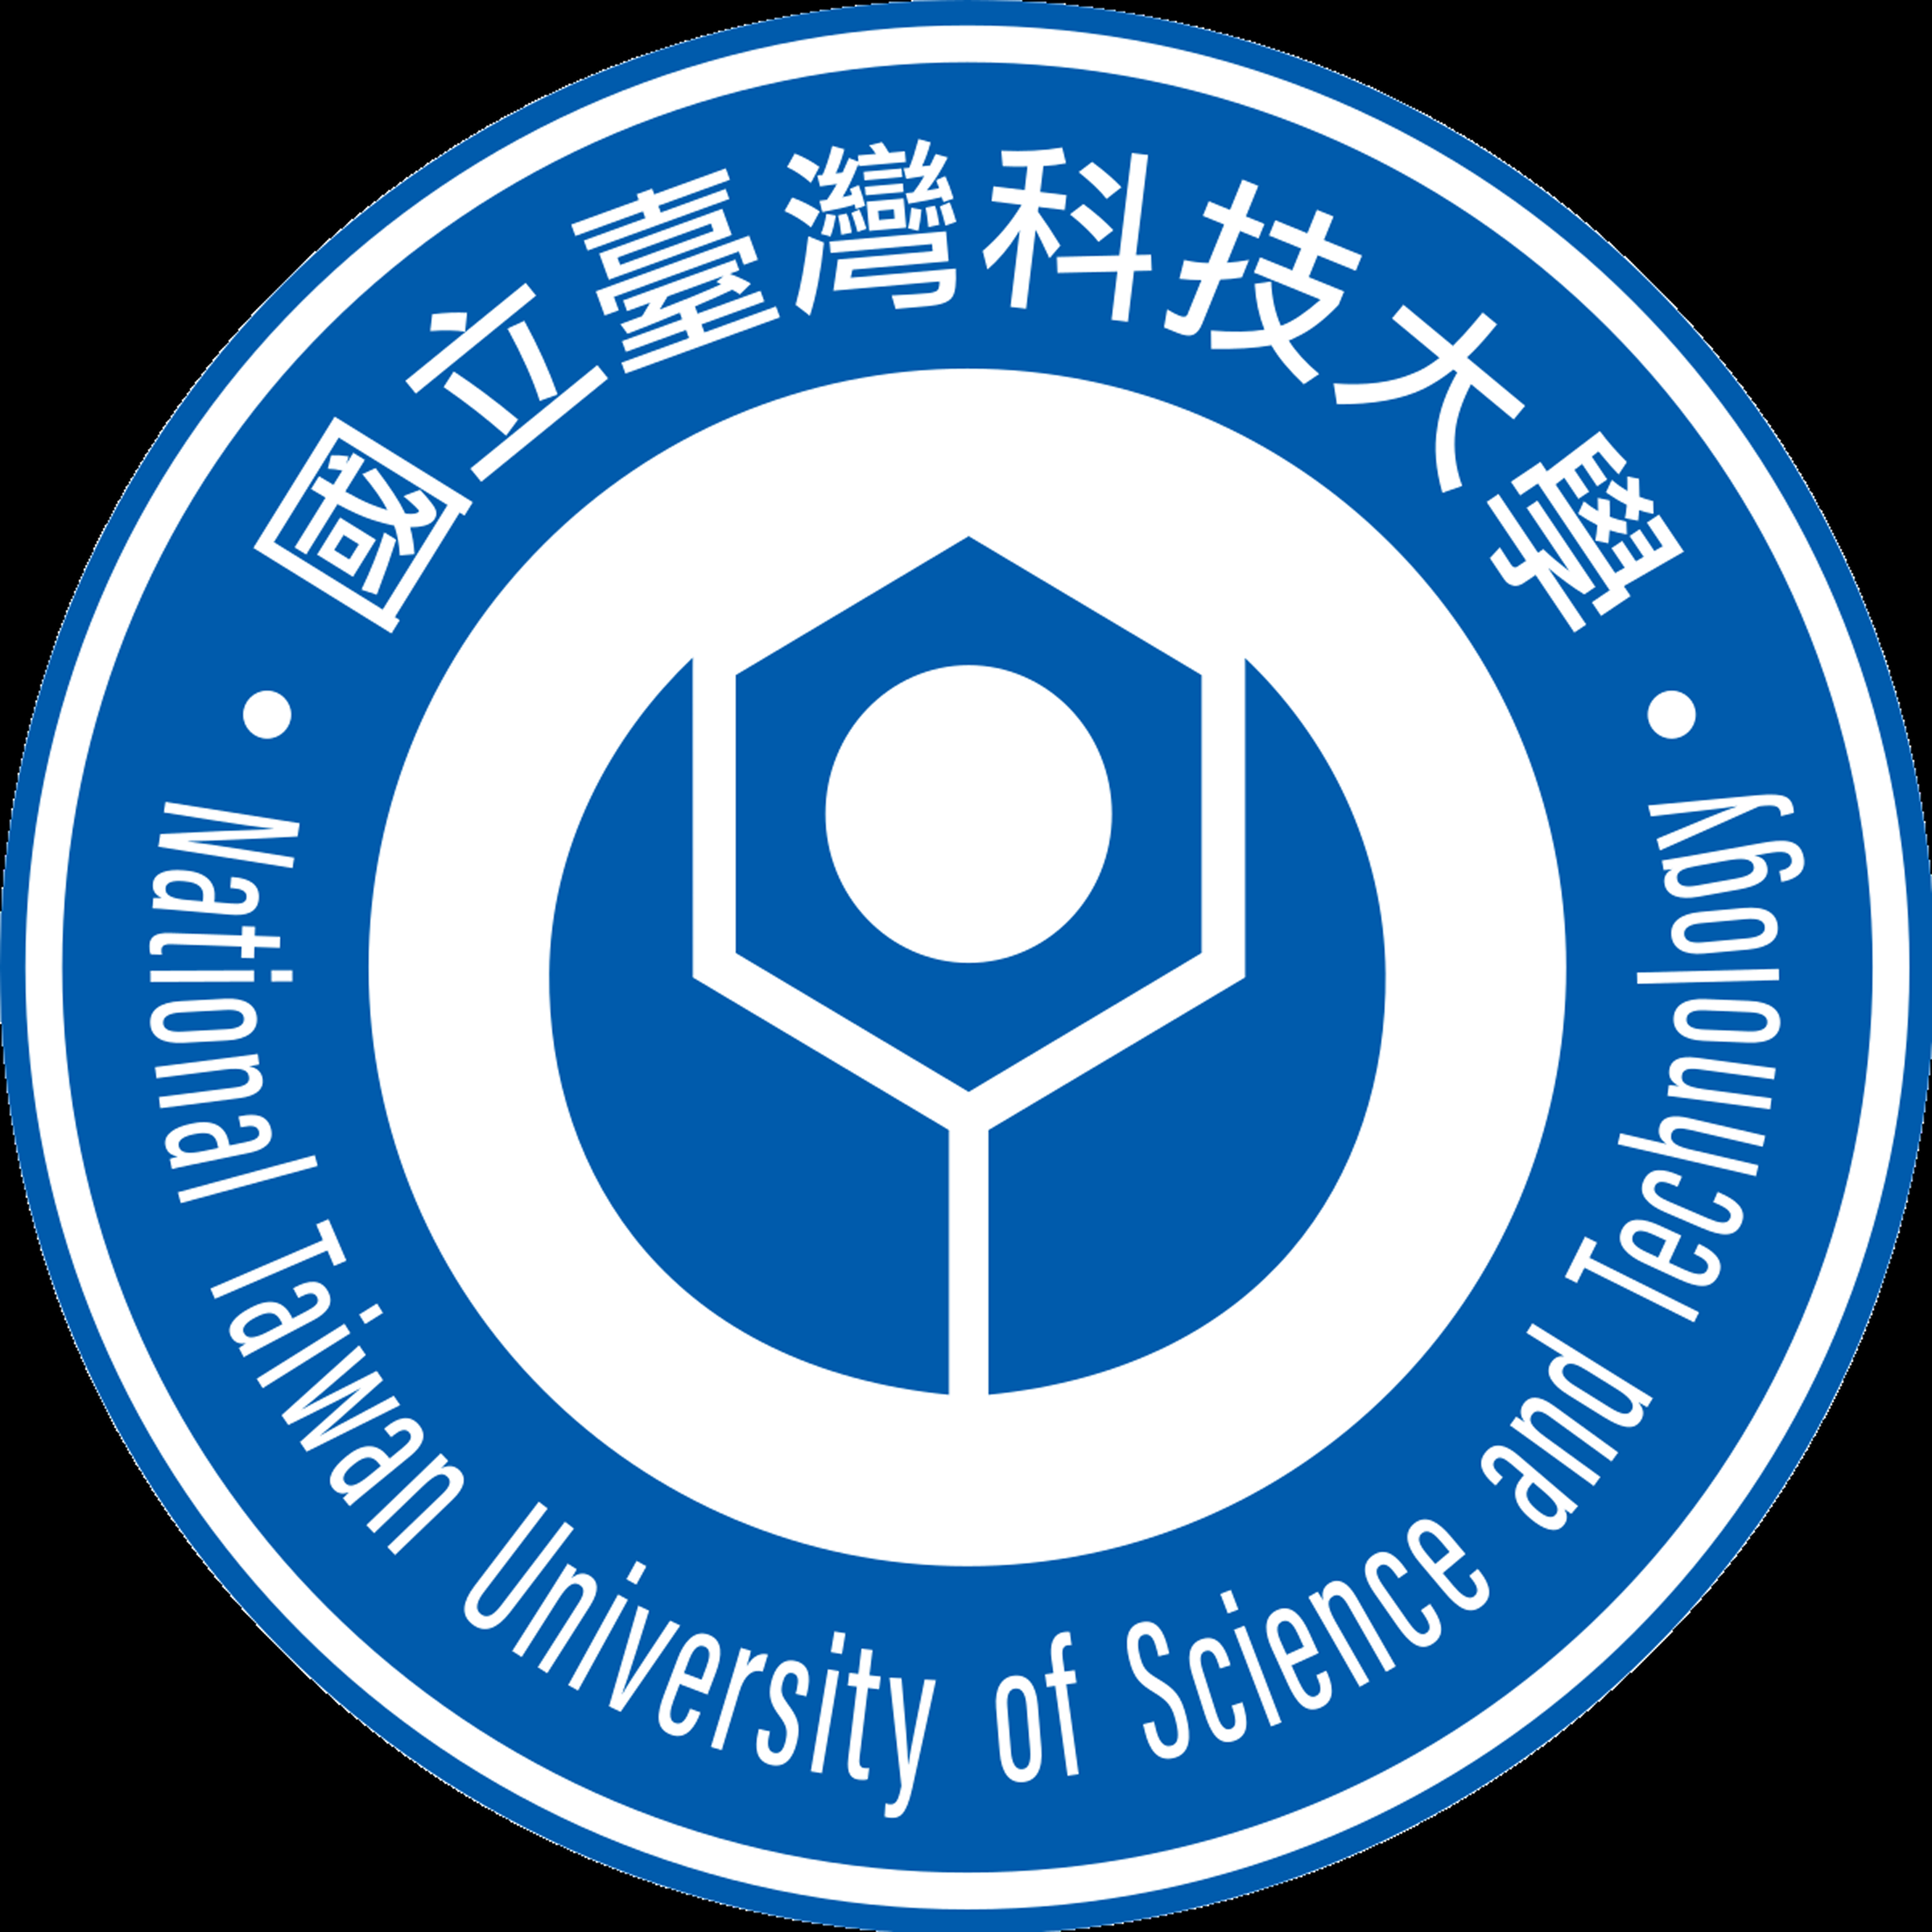

(2400, 2400, 3)


In [7]:
res = cv.resize(img,None,fx=2,fy=2,interpolation=cv.INTER_CUBIC)
cv_imshow(res)
print(res.shape)

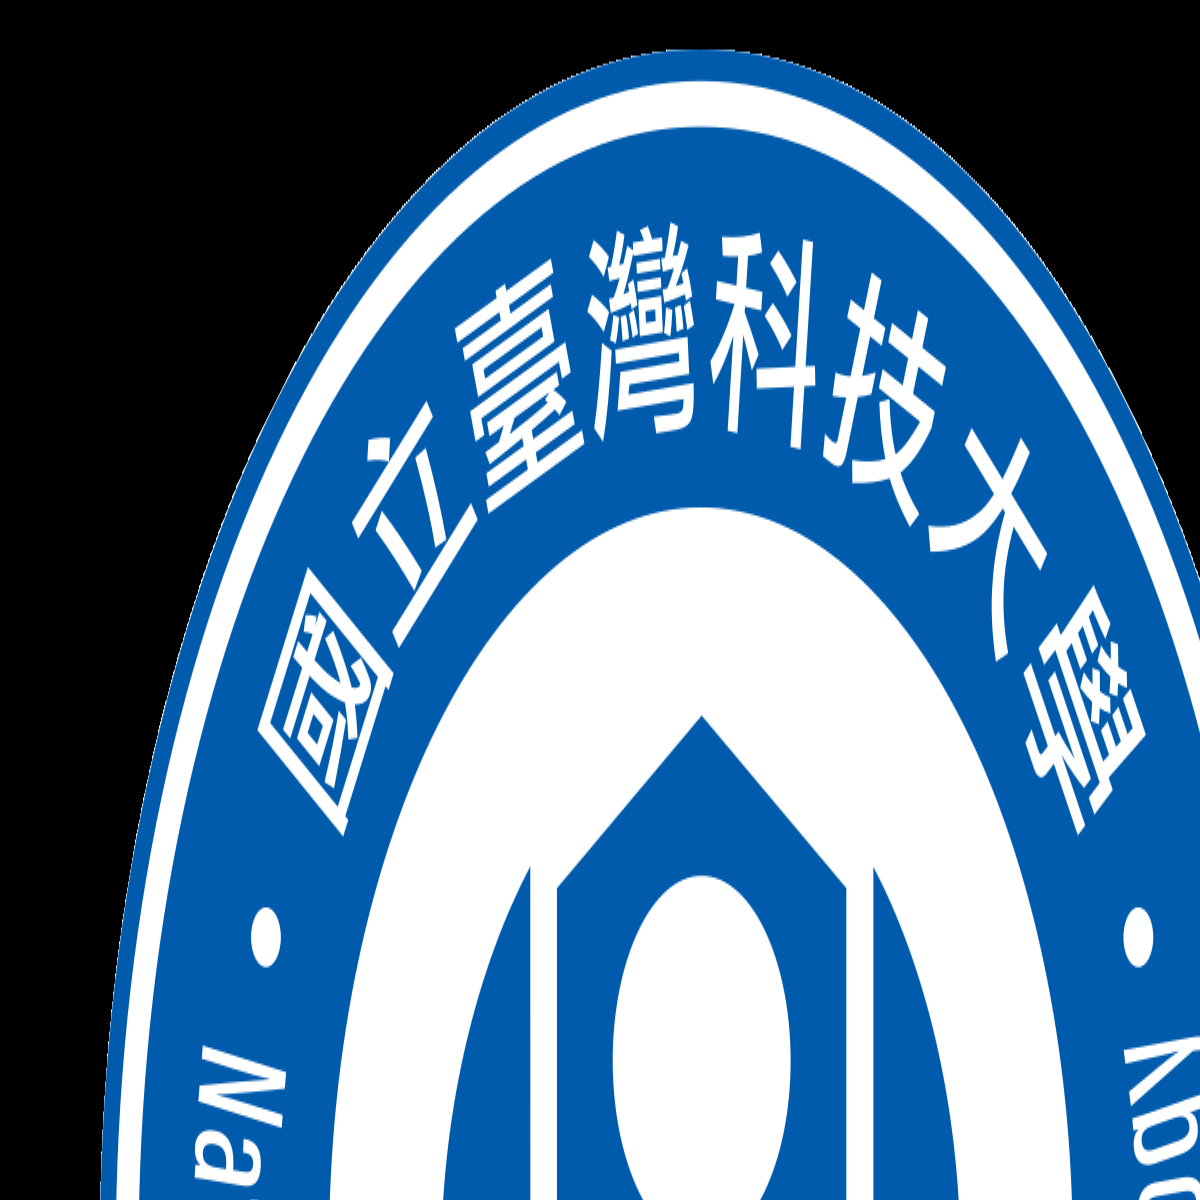

In [8]:
rows,cols,channel = img.shape
m = np.float32([[1,0,100],[0,2,50]])
dst=cv.warpAffine(img,m,(cols,rows))
cv_imshow(dst)

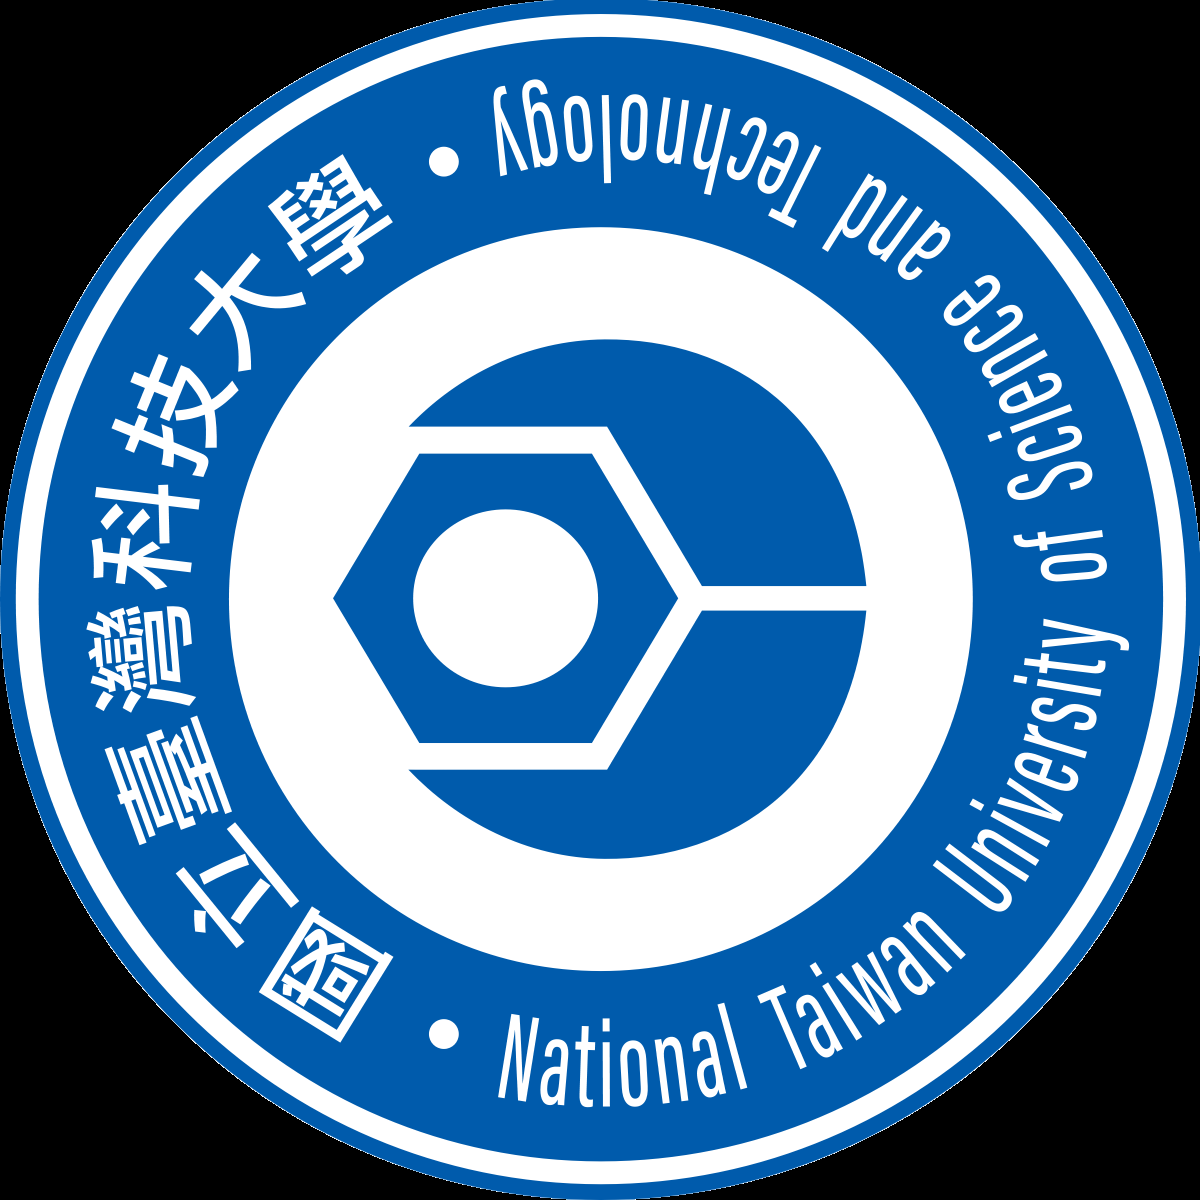

In [9]:
m =cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst=cv.warpAffine(img,m,(cols,rows))
cv_imshow(dst)

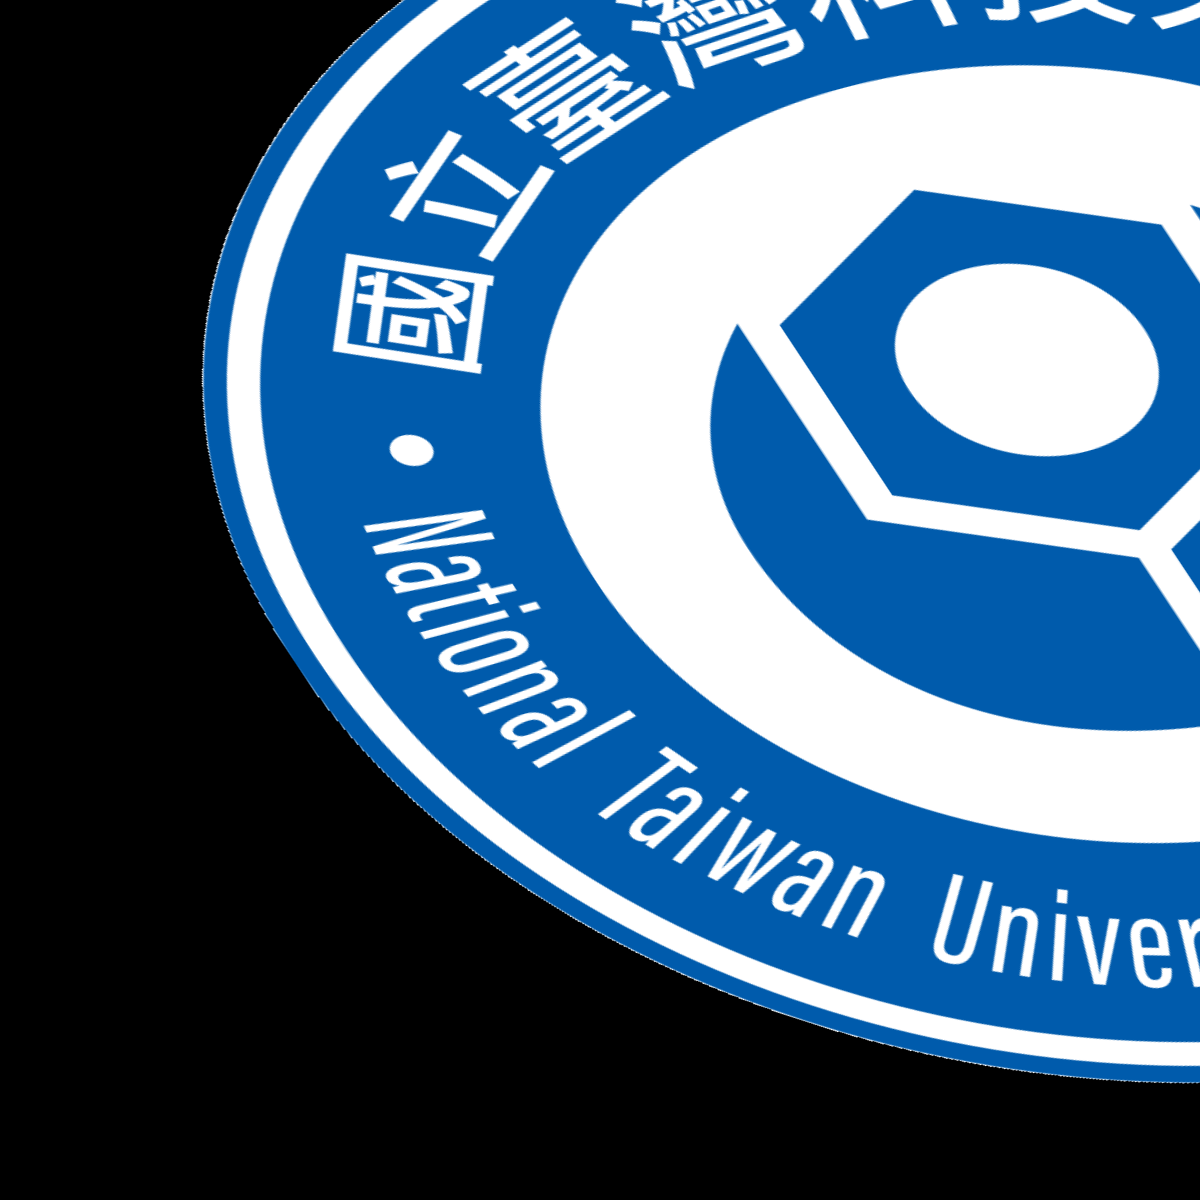

In [10]:
rows,cols,channel=img.shape
pts1 =np.float32([[56,50],[200,50],[50,200]])
pts2 =np.float32([[10,100],[200,50],[100,250]])
m = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,m,(cols,rows))
cv_imshow(dst)

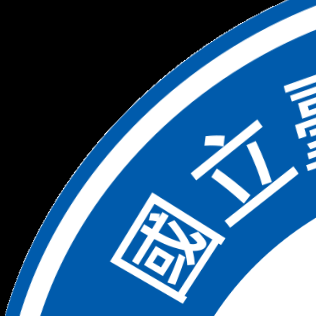

In [11]:
# rows,cols,channel=img.shape
pts1 =np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 =np.float32([[0,0],[300,0],[0,300],[300,300]])
m = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,m,(316,316))
cv_imshow(dst)  